# Claude 3 Vision Capabilities

### Installing required libraries

In [12]:
pip install -q anthropic


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Upgrade existing library

In [11]:
pip install --upgrade -q anthropic


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Show current version used

In [6]:
pip show anthropic

Name: anthropic
Version: 0.31.0
Summary: The official Python library for the anthropic API
Home-page: 
Author: 
Author-email: Anthropic <support@anthropic.com>
License: 
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tokenizers, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### Load environment variable

In [9]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(),override=True)

True

## Claude Multimodal AI: Vision Capabilities

### Using Local Image Files

In [18]:
pip install IPython -q


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


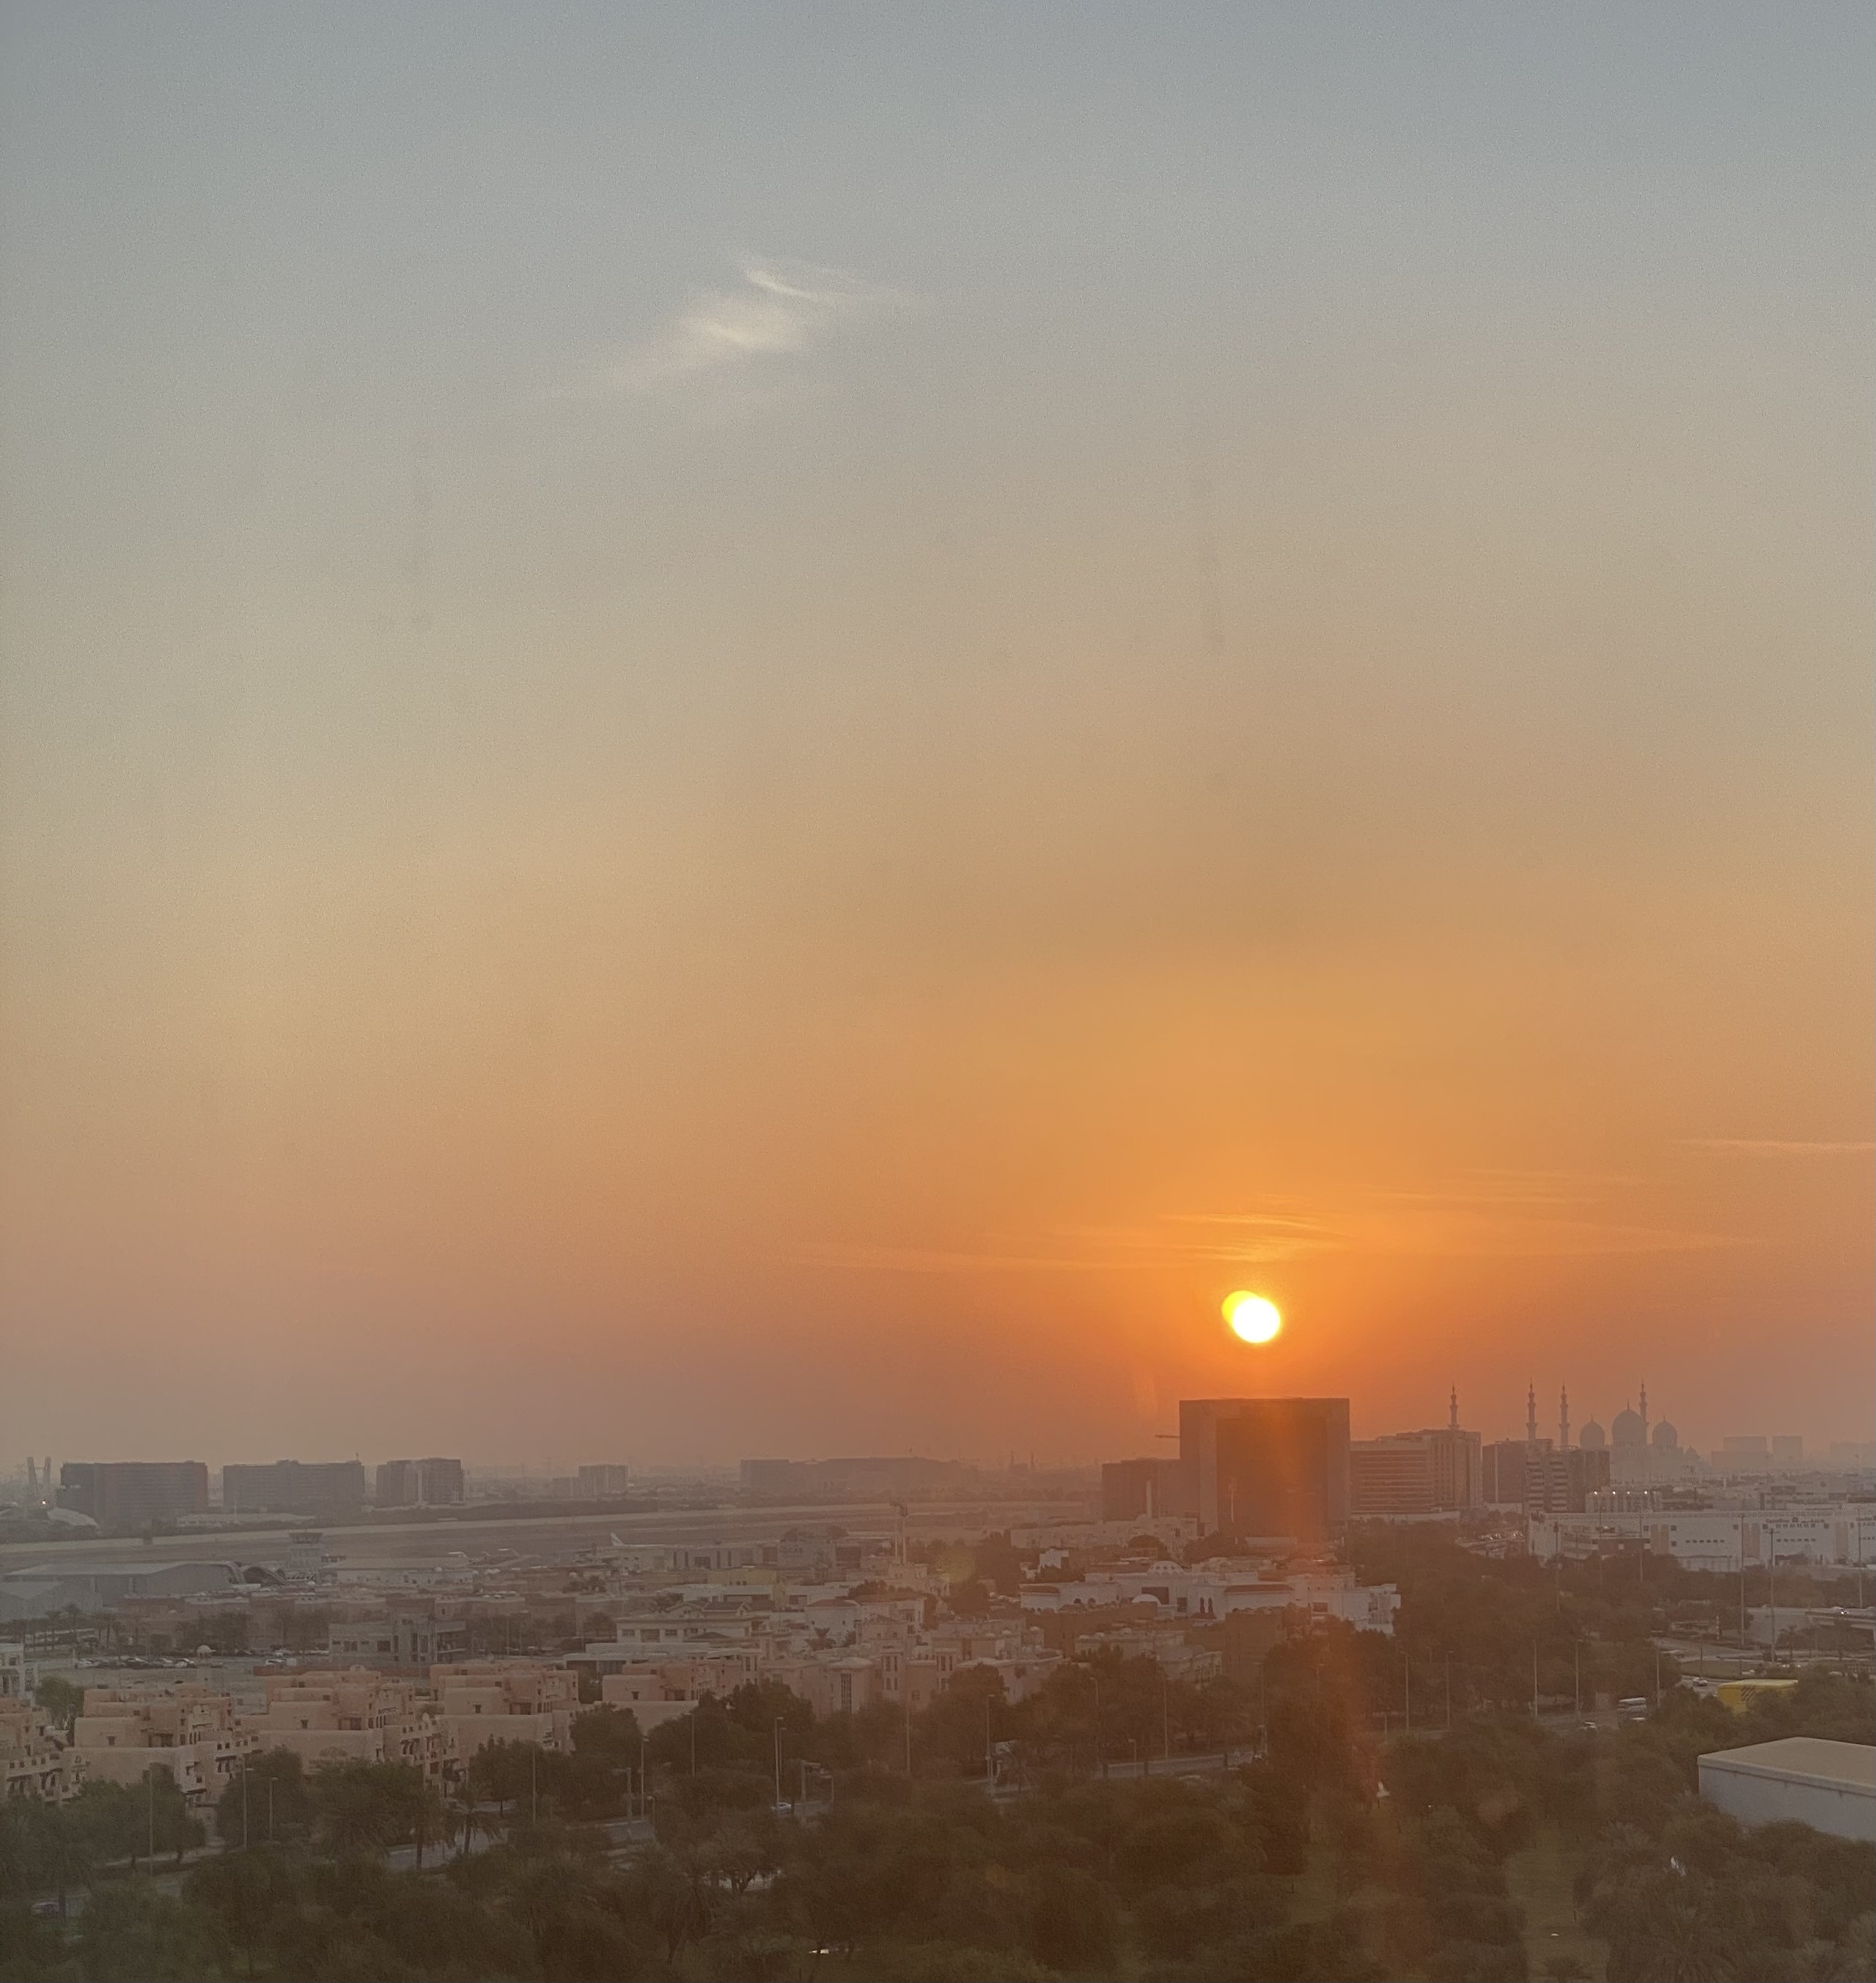

In [20]:
filename = 'Files/sun.jpg'
from IPython.display import Image

Image(filename, width=600)

In [22]:
import base64
with open(filename, 'rb') as image_file:
    image_binary_data = image_file.read()
    image_base64_string = base64.b64encode(image_binary_data).decode('utf-8')

In [26]:
from anthropic import Anthropic
client = Anthropic()
model_name='claude-3-haiku-20240307'

messages_list = [
    {
        'role':'user',
        'content':[
            {
                'type':'image',
                'source':{
                    'type':'base64',
                    'media_type':'image/jpeg',
                    'data':image_base64_string
                }
            },
            {
                'type':'text',
                # 'text':'Describe this image'
                'text':'Write a haiku about this image'
            }
        ]
    }
]

response = client.messages.create(
    model=model_name,
    max_tokens=1024,
    messages=messages_list
)

print(response.content[0].text)

Skyline at sunset,
Golden hues paint the horizon,
Peaceful cityscape.


In [28]:
def chat_with_image(image_binary_data, image_type='image/jpeg', text_prompt='Describe this image', 
                    model_name='claude-3-haiku-20240307', max_tokens=1024):
    from anthropic import Anthropic
    import base64

    image_base64_string = base64.b64encode(image_binary_data).decode('utf-8')
    client = Anthropic()

    messages_list = [
        {
            'role':'user',
            'content':[
                {
                    'type':'image',
                    'source':{
                        'type':'base64',
                        'media_type':image_type,
                        'data':image_base64_string
                    }
                },
                {
                    'type':'text',
                    'text':text_prompt
                }
            ]
        }
    ]
    
    response = client.messages.create(
        model=model_name,
        max_tokens=1024,
        messages=messages_list
    )
    
    return response.content[0].text

In [34]:
with open('Files/sun.jpg', 'rb') as image_file:
    image_binary_data = image_file.read()
    response = chat_with_image(image_binary_data, text_prompt='Describe this image in a great details')
    print(response)

This image depicts a stunning sunset over an urban skyline. The sky is filled with a gradient of warm, vivid colors, transitioning from a deep orange at the horizon to a soft, pale blue higher in the sky. There appears to be some haze or light fog, which adds a slightly hazy, atmospheric quality to the scene.

In the foreground, the urban landscape is visible, with a cluster of high-rise buildings and structures silhouetted against the vibrant sunset. The buildings seem to be a mix of residential and commercial structures, creating a dense, metropolitan cityscape. The sun is just visible, a bright, golden orb peeking through the haze and illuminating the scene with a warm, glowing light.

The overall composition creates a sense of tranquility and beauty, with the striking natural colors of the sky contrasting with the built environment below. It's a captivating and visually striking image that captures the serene moments just before the sun dips below the horizon.


### Online Image

In [37]:
image_url = 'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg?auto=compress&cs=tinysrgb&h=350'
Image(url=image_url, width=400)

In [39]:
import httpx
response = httpx.get(image_url)
if response.status_code == 200:
    print('Image fetched successfully')
    image_binary_data = response.content
else:
    print(f'Failed to fetch image. Status code: {response.status_code}')

Image fetched successfully


In [49]:
prompt = 'Describe this image, and what breed is this animal in the image?'
response = chat_with_image(image_binary_data=image_binary_data, text_prompt=prompt, max_tokens=2048)
print(response)

The image shows a close-up of a cat's face. The cat has a tabby coat pattern with stripes and spots, and its eyes are a striking green color, which stand out against the dark background. The cat's ears are perked up and its expression appears alert and engaged. Based on the cat's physical features, this appears to be a domestic shorthair or mixed breed cat, rather than a specific purebred variety.


### Vision Testing: Handwriting, Charts

In [74]:
image_url = 'https://raw.githubusercontent.com/anthropics/anthropic-cookbook/main/images/transcribe/school_notes.png'
Image(url=image_url, width=400)

In [76]:
import httpx
response = httpx.get(image_url)
if response.status_code == 200:
    print('Image fetched successfully')
    image_binary_data = response.content
else:
    print(f'Failed to fetch image. Status code: {response.status_code}')

Image fetched successfully


In [78]:
prompt = 'Transcribe the text on this image. Only output the text and nothing else.'
response = chat_with_image(image_binary_data=image_binary_data,image_type='image/png', text_prompt=prompt, max_tokens=2048)
print(response)

W.6.4 Levels of Cellular Organization
1) Cells group together to make tissue.
2) Tissues group together to make an organ.
3) Organs group together to make an organ system.
4) Organ Systems group together to make an organism.

Organism - a living thing that can carry out life processes by itself.

Multicellular organisms have specialized cells to perform specific functions. This makes them more efficient and typically have a longer life span.

Tissue: a group of similar cells that perform a common function.
1) Animals are made of four basic types of tissue: nervous, epithelial, connective, and muscle.
2) Plants have three types of tissue: transport, protective, and ground.


In [80]:
image_url = 'https://raw.githubusercontent.com/anthropics/anthropic-cookbook/main/images/reading_charts_graphs/cvna_2021_annual_report_image.png'
Image(url=image_url, width=400)

In [82]:
import httpx
response = httpx.get(image_url)
if response.status_code == 200:
    print('Image fetched successfully')
    image_binary_data = response.content
else:
    print(f'Failed to fetch image. Status code: {response.status_code}')

Image fetched successfully


In [92]:
prompt = "What was the company total revenue in 2015?"
response = chat_with_image(image_binary_data=image_binary_data,image_type='image/png', text_prompt=prompt, max_tokens=2048)
print(response)

According to the chart, the company's total revenue in 2015 was $130 million.


### Combining Multiple Images

In [101]:
first_image_url = 'https://raw.githubusercontent.com/anthropics/anthropic-cookbook/main/images/best_practices/140.png'
Image(url=first_image_url, width=400)

In [103]:
second_image_url = 'https://raw.githubusercontent.com/anthropics/anthropic-cookbook/main/images/best_practices/70.png'
Image(url=second_image_url, width=400)

In [105]:
import httpx
response = httpx.get(first_image_url)
if response.status_code == 200:
    print('Image fetched successfully')
    first_image_binary_data = response.content
else:
    print(f'Failed to fetch image. Status code: {response.status_code}')

Image fetched successfully


In [107]:
import httpx
response = httpx.get(second_image_url)
if response.status_code == 200:
    print('Image fetched successfully')
    second_image_binary_data = response.content
else:
    print(f'Failed to fetch image. Status code: {response.status_code}')

Image fetched successfully


In [111]:
from anthropic import Anthropic
client = Anthropic()
model_name='claude-3-haiku-20240307'

first_image_base64_string = base64.b64encode(first_image_binary_data).decode('utf-8')
second_image_base64_string = base64.b64encode(second_image_binary_data).decode('utf-8')

messages_list = [
    {
        'role':'user',
        'content':[
            {
                'type':'image',
                'source':{
                    'type':'base64',
                    'media_type':'image/png',
                    'data':first_image_base64_string
                }
            },
            {
                'type':'image',
                'source':{
                    'type':'base64',
                    'media_type':'image/png',
                    'data':second_image_base64_string
                }
            },
            {
                'type':'text',
                'text':'How are these images different? Write the key differences. What are these pictures about?'
            }
        ]
    }
]

response = client.messages.create(
    model=model_name,
    max_tokens=1024,
    messages=messages_list
)

print(response.content[0].text)

The key differences between the two images are:

1. The speedometer/odometer needle position has changed, indicating a different speed or distance traveled.
2. The odometer display shows a different reading, with the first image showing 11,582 and the second image showing 11,582.

These images appear to be from a vehicle's dashboard display, showing the speedometer/odometer. The speedometer provides information about the vehicle's speed, while the odometer tracks the total distance traveled by the vehicle.
